In [13]:
# import the packages needed for plotting
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
filename = "RawDataGA1_invasionrate.csv"
df = pd.read_csv(filename) # this loads the data as a data frame
df['Strain_merged'] = df['Strain'].str.split(" ").str[0]

df # display dataframe

,Cylcle,Condition,Strain,Rep 1,Rep 2,Rep 3,Mean,SD,Strain_merged
0,1,Static,Barseq,4.705882,4.552113,4.754875,4.670957,0.061082,Barseq
1,1,Static,KOEBA140 C3,3.911063,4.410256,4.073118,4.131479,0.147030,KOEBA140
2,1,Static,KORH4 C1,4.315098,3.823770,5.179688,4.439519,0.396332,KORH4
3,1,Static,KOPfs25 C3,0.000000,5.047319,4.852941,3.300087,1.650997,KOPfs25
4,1,Static,KOEBA181 C1,4.447796,3.485822,3.816733,3.916784,0.282168,KOEBA181
...,...,...,...,...,...,...,...,...,...
235,8,Shaking,KOPfs25 C1,4.172552,5.577367,6.222778,5.324233,0.605231,KOPfs25
236,8,Shaking,KOEBA140 C4,1.840637,2.172507,2.680180,2.231108,0.244120,KOEBA140
237,8,Shaking,KOEBA181 C2,3.642553,4.769968,5.050100,4.487540,0.430163,KOEBA181
238,8,Shaking,KOP230P C3,2.121154,2.690265,2.731754,2.514391,0.196983,KOP230P


In [15]:

df['Strain'] = df['Strain'].str.strip()
df['Clone'] = df['Strain'].str.split(' ').apply(lambda x: x[1] if len(x) > 1 else '')
df['Line'] = df['Strain'].str.split(' ').apply(lambda x: x[0])

line_order = ['NF54', 'KOP230P', 'KOPfs25', 'KOEBA140', 'KOEBA175', 'KOEBA181', 'KORH1', 'KORH2a', 'KORH4', 'Barseq']
strain_order = ['NF54', 'KOP230P C3','KOP230P C5', 'KOPfs25 C1', 'KOPfs25 C3', 'KOEBA140 C3','KOEBA140 C4', 'KOEBA175 C6', 'KOEBA181 C1', 'KOEBA181 C2', 'KORH1 C1' , 'KORH2a C1', 'KORh2a C3', 'KORH4 C1', 'Barseq']

FileNotFoundError: [Errno 2] No such file or directory: 'Graphs/GA1 invasion rate separate(Shaking)dots.pdf'

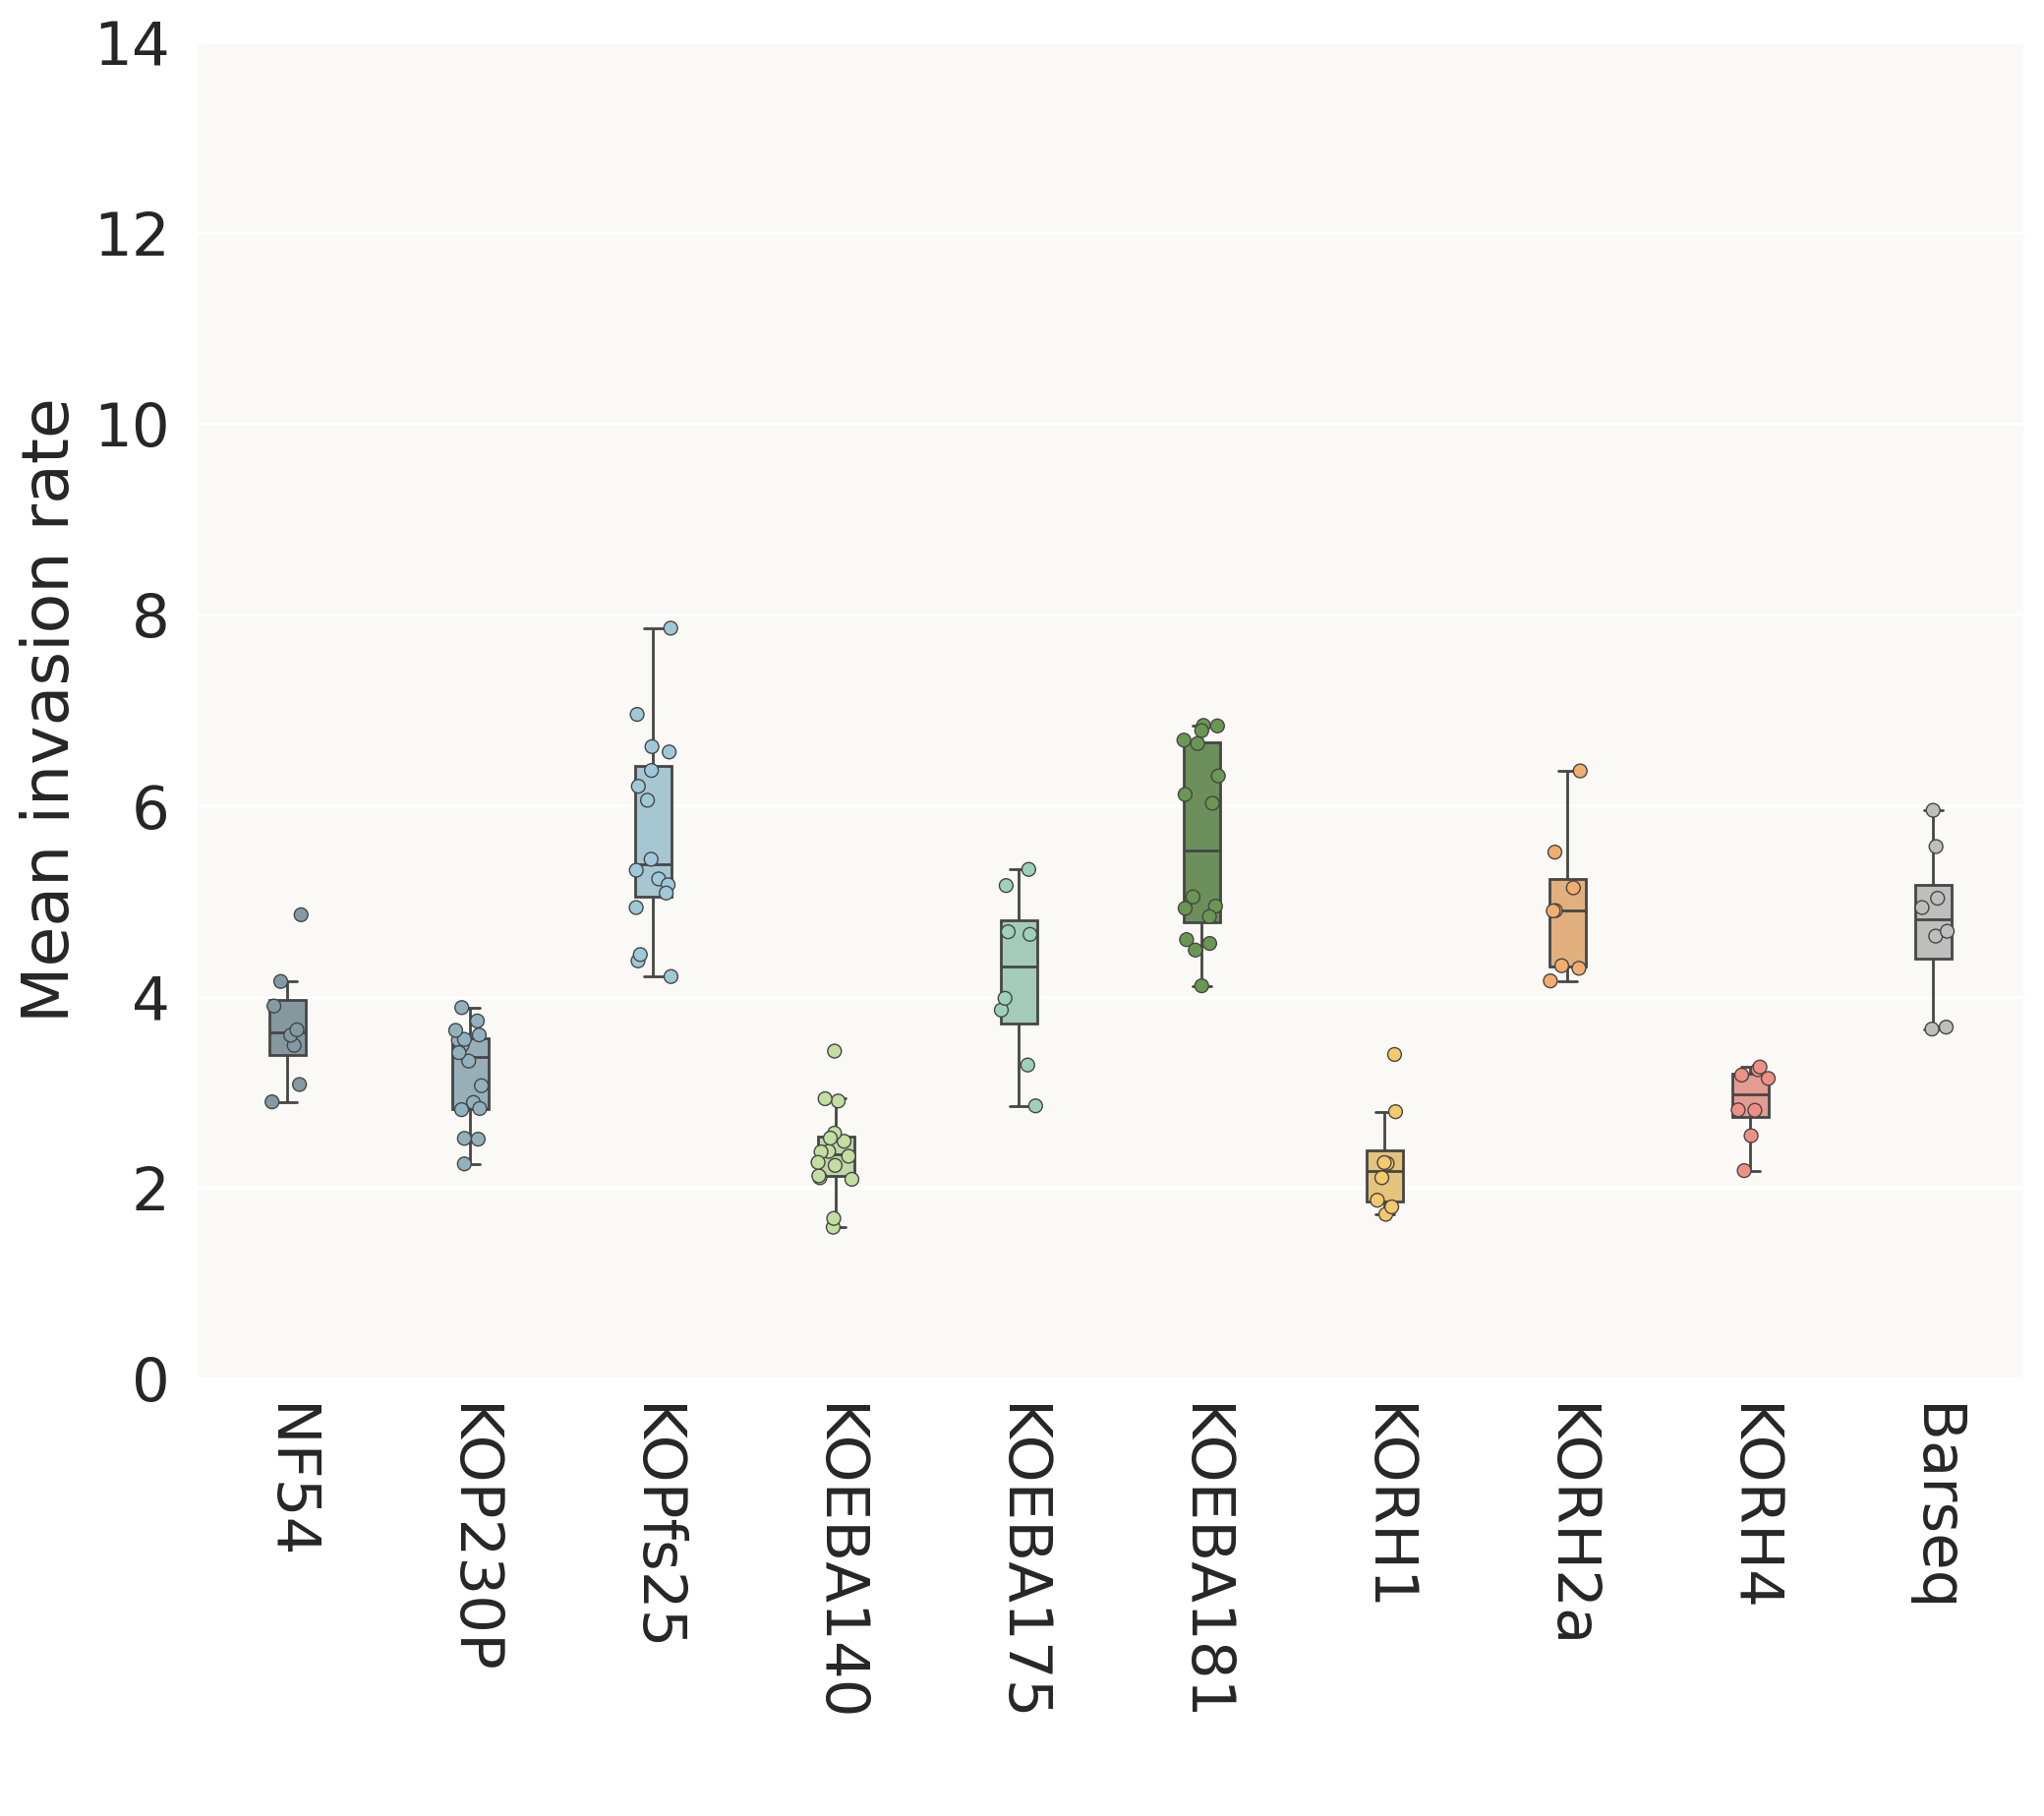

In [16]:
colors_light = {
    'NF54': '#829AA3',
    'KOP230P': '#91b1be',
    'KOPfs25': '#9fc9d9',
    'KOEBA140': '#C2DEA1',
    'KOEBA181': '#6A9852',
    'KOEBA175': '#9DD1BB',
    'KOEBA175+Anti-GYPA':'#84BFC5',
    'KORH1': '#F6C96A',
    'KORH4': '#F09084',
    'KORh2a': '#F3AE6D',
    'KORH2a': '#F3AE6D',
    'Barseq': '#BEBFBC',
}

colors_dark = {
    'NF54': '#043546',
    'KOP230P': '#406a7d',
    'KOPfs25': '#78a3b9',
    'KOEBA140': '#9ECA69',
    'KOEBA181': '#486737',
    'KOEBA175': '#6AB997',
    'KOEBA175+Anti-GYPA':'#04A0AF',
    'KORH1': '#F1AF23',
    'KORH4': '#E8513E',
    'KORh2a': '#ED8626',
    'KORH2a': '#ED8626',
    'Barseq': '#6B777D',
}
# this coulours are a dictanary so need curly brackets to define, they have a key : value 

PLOT_CLONES = False # Change this to plot False to plot clones merged together

x_label = "Strain" if PLOT_CLONES else "Strain_merged"
x_sort_label = strain_order if PLOT_CLONES else line_order

for colors, (condition, dfq) in zip([colors_light, colors_dark], df.groupby('Condition')):

    plt.figure()
    sns.set_theme(context='notebook', style='darkgrid', font='Candara', font_scale=2, color_codes=True, rc=None)
    sns.set_style(rc = {'axes.facecolor': '#FBF9F6'})
    ax = sns.boxplot(
        data=dfq, 
        x=x_label,
        order=x_sort_label, 
        y='Mean', 
        hue='Line', 
        palette=colors, 
        #saturation=.5, 
        dodge=False, 
        showfliers=False, 
        width=0.2
    )
    
    #sns.swarmplot(data=df, x='Strain', y='Mean', order=x_sort_label)
    plt.xticks(rotation=-90)
    #sns.stripplot(data=dfq, x='Strain', order=x_sort_label, y='Mean', marker='o', color='.0', alpha=0.3)
    
    sns.stripplot(
        data=dfq, 
        x=x_label, 
        y='Mean', 
        order=x_sort_label, 
        hue='Line', 
        jitter=True, 
        linewidth=0.5, 
        palette=colors
    )
   
    plt.gcf().set_size_inches(12,9)
    plt.gcf().set_dpi(200)

    plt.ylim((0,14))
    plt.legend([],[], frameon=False)
    
    plt.xlabel(' ')
    plt.ylabel('Mean invasion rate')

    # plt.savefig(f'Graphs/GA1 invasion rate separate({condition})dots.svgz', bbox_inches='tight')
    plt.savefig(f'Graphs/GA1 invasion rate separate({condition})dots.pdf', bbox_inches='tight')

In [ ]:

plt.figure()
ax = sns.boxplot(data=df, x='Strain', order=strain_order, y='Mean', hue='Condition', showfliers=False)
#sns.swarmplot(data=df, x='Strain', y='Mean')
plt.xticks(rotation=-90)

for i, a in enumerate(ax.patches):
    if i == 2:
        a.set_facecolor('red')
    
plt.gcf().set_size_inches(10,6)
plt.gcf().set_dpi(100)

plt.ylim((0,14))
plt.legend([],[], frameon=False)

plt.savefig('Graphs/test.pdf')

In [ ]:
# Define color dictionaries for light and dark colors
colors_light = {
    'NF54': '#829AA3',
    'KOP230P': '#91b1be',
    'KOPfs25': '#9fc9d9',
    'KOEBA140': '#C2DEA1',
    'KOEBA181': '#6A9852',
    'KOEBA175': '#9DD1BB',
    'KOEBA175+Anti-GYPA': '#84BFC5',
    'KORH1': '#F6C96A',
    'KORH4': '#F09084',
    'KORh2a': '#F3AE6D',
    'KORH2a': '#F3AE6D',
    'Barseq': '#BEBFBC',
}

colors_dark = {
    'NF54': '#043546',
    'KOP230P': '#406a7d',
    'KOPfs25': '#78a3b9',
    'KOEBA140': '#9ECA69',
    'KOEBA181': '#486737',
    'KOEBA175': '#6AB997',
    'KOEBA175+Anti-GYPA': '#04A0AF',
    'KORH1': '#F1AF23',
    'KORH4': '#E8513E',
    'KORh2a': '#ED8626',
    'KORH2a': '#ED8626',
    'Barseq': '#6B777D',
}



PLOT_CLONES = True # Change this to plot False to plot clones merged together


x_label = "Strain" if PLOT_CLONES else "Strain_merged"
#x_label = 'Line'
x_sort_label = strain_order if PLOT_CLONES else line_order

# Separate box plots for shaking and static conditions
plt.figure(figsize=(15, 12))


OFFSET = 0.152
#for boxes to sit next to each other offset should be half the width of the boxes

# Shaking condition
sns.set_theme(#context='notebook', 
            #style='ticks', 
            style='darkgrid', 
            font='arial', 
            font_scale=3.5) 
            #   color_codes=True, 
            #   rc=None)
sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})
#sns.set_style(rc = {'axes.facecolor': '#FBF9F6'})

edge_color='black'

PROPS = {
    'boxprops':{'edgecolor':edge_color},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':edge_color},
    'capprops':{'color':edge_color}
}

ax_shaking = sns.boxplot(
    data=df[df['Condition'] == 'Shaking'],
    x=x_label,
    order=x_sort_label,
    y='Mean',
    hue='Line',
    palette=colors_dark,
    showfliers=False,
    dodge=False, 
    width=0.3,
    box_offset=OFFSET,
    **PROPS,
)

# Static condition
sns.set_theme(context='notebook', style='darkgrid', font='Candara', font_scale=2, color_codes=True, rc=None)
#sns.set_style(rc = {'axes.facecolor': '#FBF9F6'})
sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})
edge_color='grey'
PROPS = {
    'boxprops':{'edgecolor':edge_color},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':edge_color},
    'capprops':{'color':edge_color}
}
ax_static = sns.boxplot(
    data=df[df['Condition'] == 'Static'],
    x=x_label,
    order=x_sort_label,
    y='Mean',
    hue='Line',
    palette=colors_light,
    dodge=False, 
    showfliers=False,
    width=0.3,
    box_offset=-OFFSET,
    **PROPS,
)

plt.xticks(rotation=90)
plt.ylim((0, 14))
plt.legend([], [], frameon=False)
plt.xlabel(' ')
plt.ylabel('Mean invasion rate')

plt.tight_layout()
plt.savefig('Graphs/GA1_invasion_rate_separate.pdf')


plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(f'Graphs/growthassay_fig3c.svg', bbox_inches='tight')

In [ ]:
from scipy import stats

# returns true if normally distributed with 5% significance level
def adtest(x):
    test = stats.anderson(x)
    return test.statistic < test.significance_level[2]


for condition, dfq in df.groupby('Condition'):
    
    print(f'\n{condition}:')
    a = dfq.query('Strain == "NF54"')['Mean']

    NF54_normally_ditributed = adtest(a)

    for strain, dfqq in dfq.query('Strain != "NF54"').groupby('Strain'):
        b = dfqq['Mean']
        if NF54_normally_ditributed and adtest(b):
            p_val = stats.ttest_ind(a, b).pvalue
            print(f'{strain:15s} ttest p-value = {p_val:.4f}, {"significant" if p_val < 0.05 else "not significant"}')

        else:
            print(strain, 'ranksums=', stats.ranksums(a, b))

In [ ]:
for strain, dfq in df.groupby('Strain'):
    a = dfq.query('Condition == "Shaking"')['Mean']
    b = dfq.query('Condition == "Static"')['Mean']
    p_val = stats.ttest_ind(a, b).pvalue
    print(f'{strain:15s} ttest p-value = {p_val:.4f}, {"significant" if p_val < 0.05 else "not significant"}')

In [ ]:
df.groupby(['Strain', 'Condition']).agg({
    'Mean': ['mean', 'std'],
})